## Load data

In [1]:
from LoadSplitData import Process
import numpy as np
np.random.seed(0)

import os
import cv2
from BuildModel import Model
from TuneModel import Model

Using TensorFlow backend.


In [2]:
data = Process()
data.split_data()

Images shape (24076, 80, 80, 3), label shape (24076,), ratio of authorized data 0.4503655092208008
X_train shape: (12639, 80, 80, 3)
12639 train samples
5418 valid samples
6019 test samples


In [3]:
X_test = data.X_test
print(X_test.shape)
Y_test = data.Y_test
print(Y_test.shape)

(6019, 80, 80, 3)
(6019, 2)


## Predict Test Data with Best Model Evaluated with fbeta_score

In [4]:
FILE_PATH = r'C:\Users\dbsnail\ImageProject\models\tune_ml_90_fbeta_score_adam.h5'
model = Model()
model.load(FILE_PATH)

Model Loaded.


In [5]:
data_size = X_test.shape[0]
TN = 0
FN = 0
FP = 0
TP = 0
num_authorized_label = 0
num_unauthorized_label = 0

for i in range(data_size): 
   
    pred_label = np.argmax(model.predict(X_test[i,]*255)[0])
    real_label = np.argmax(Y_test[i,])

    if real_label == 1:
        num_authorized_label += 1
        if pred_label == real_label:
            TP += 1
        else:
            FN += 1
            
    else:
        num_unauthorized_label += 1
        if pred_label == real_label:
            TN += 1
        else:
            FP += 1   
print("TN = {}\nFP = {}\nFN = {}\nTP = {}\n".format(TN, FP, FN, TP))    
print("num_authorized_label:{}".format(num_authorized_label))
print("num_unauthorized_label:{}".format(num_unauthorized_label))

TN = 3346
FP = 16
FN = 12
TP = 2645

num_authorized_label:2657
num_unauthorized_label:3362


## Predict Test Data with Best Model Evaluated with Accuracy

In [6]:
FILE_PATH = r'C:\Users\dbsnail\ImageProject\models\ml_70_adam.h5'
model = Model()
model.load(FILE_PATH)

Model Loaded.


In [77]:
data_size = X_test.shape[0]
TN = 0
FN = 0
FP = 0
TP = 0
num_authorized_label = 0
num_unauthorized_label = 0

FN_images = []
FP_images = []
for i in range(data_size): 
    pred_label = (model.predict(X_test[i,]*255))[1]
    real_label = np.argmax(Y_test[i,])
    
    if real_label == 1:
        num_authorized_label += 1
        if (pred_label - real_label) == 0:
            TP += 1
        else:
            FN += 1
            FN_images.append(X_test[i]*255)
            
    else:
        num_unauthorized_label += 1
        if (pred_label - real_label) == 0:
            TN += 1
        else:
            FP += 1 
            FP_images.append(X_test[i]*255)
print("TN = {}\nFP = {}\nFN = {}\nTP = {}\n".format(TN, FP, FN, TP))    
print("num_authorized_label:{}".format(num_authorized_label))
print("num_unauthorized_label:{}".format(num_unauthorized_label))

TN = 3351
FP = 11
FN = 7
TP = 2650

num_authorized_label:2657
num_unauthorized_label:3362


## Display false negative images

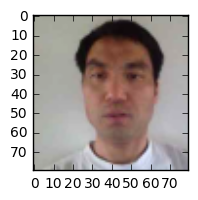

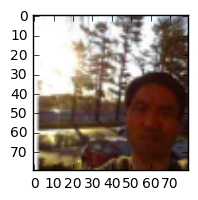

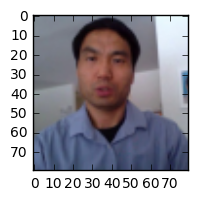

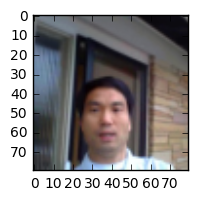

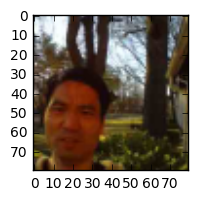

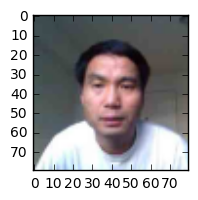

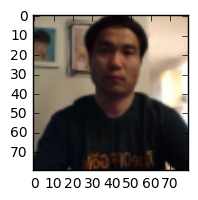

In [87]:
from scipy.misc import toimage
import matplotlib.pyplot as plt
%matplotlib inline

n_cols = 3
n_rows = 3
for img in FN_images:
    img = toimage(img)
    b, g, r = img.split()
    img = Image.merge("RGB", (r, g, b))
    plt.figure(figsize=(2,2))
    plt.imshow(img)

## Display false positive images

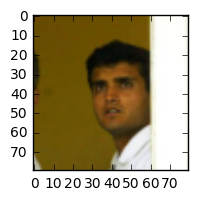

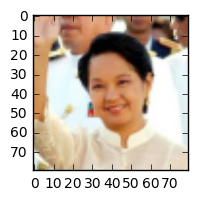

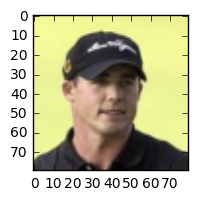

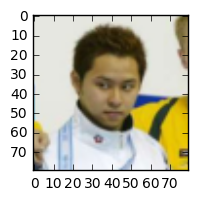

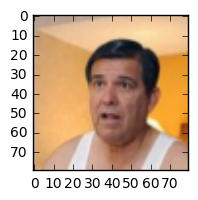

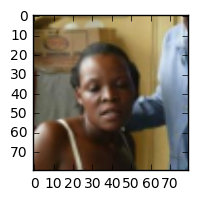

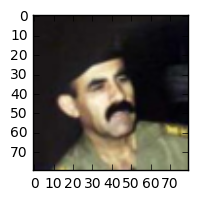

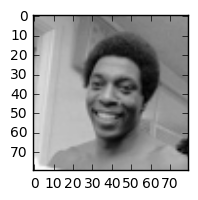

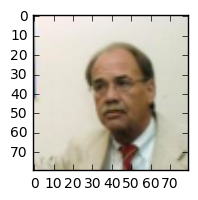

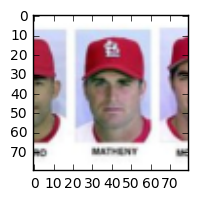

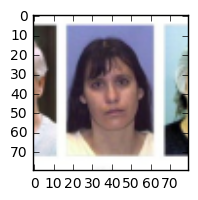

In [89]:
%matplotlib inline
for img in FP_images:
    img = toimage(img)
    b, g, r = img.split()
    img = Image.merge("RGB", (r, g, b))
    plt.figure(figsize=(2,2))
    plt.imshow(img)

In [85]:
# Thanks